In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify

In [27]:
zones_09 = gpd.read_file('zoning_metro_2009/zoning_metro_2009.shp')

In [28]:
gpd.read_file('zoning_pdx_2015.geojson').to_crs(pdx_zones.crs)

CITY_NO          1
ZONE            28
ZONE_CLASS      19
ZONEGEN_CL       7
CITY             1
AREA          2696
Shape_Leng    2696
Shape_Area    2696
geometry      2696
dtype: int64

In [29]:
test_demo = pd.read_csv('pdx_demographics_2015.csv')
test_demo = pd.read_csv('pdx_demographics_2015.csv')

test_demo['Label (Grouping)'] = test_demo['Label (Grouping)'].apply(lambda x: str(x).replace(u'\xa0', u''))
test_demo.columns = test_demo.columns.str.replace('!!', ' ')


test_demo['Label (Grouping)'] = test_demo['Label (Grouping)'].apply(lambda x: str(x).replace(u'\xa0', u''))
test_demo.columns = test_demo.columns.str.replace('!!', ' ')


og = test_demo.copy()

#to get the rows outside of "one race" dropdown
rows = [2] + list(range(60, 75))
test_demo = test_demo.iloc[rows]


#note that median age and total housing units are in 'estimate' columns
vals_to_keep = {'Male', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and Other Pacific Islander',
                'Some Other Race', 'Hispanic or Latino (of any race)',
               }

test_demo = test_demo[test_demo['Label (Grouping)'].isin(vals_to_keep)]


test_demo = test_demo.filter(regex='^(?=.*(?i)percent|label)(?!.*(?i)percent margin of error)')

pivoted = test_demo.set_index('Label (Grouping)').T
pivoted.reset_index(inplace = True)
pivoted.rename({'index': 'ZIP'}, axis = 1, inplace = True)
pivoted['ZIP'] = pivoted['ZIP'].str.extract(r'ZCTA5 (\d+) Percent')[0]

In [37]:
missing = set(pivoted['ZIP'].astype(int).unique()) - set(merged['ZIPCODE'].unique())

In [38]:
missing

{97034, 97086, 97210, 97222, 97223, 97225, 97239, 98660}

In [43]:
set(pivoted['ZIP'].astype(int).unique()) - set(df['ZIP'].unique())

{97034, 97086, 97210, 97222, 97223, 97225, 97239, 98660}

# Zoning dist

In [2]:
df = pd.read_csv('pdx_full_data.csv')

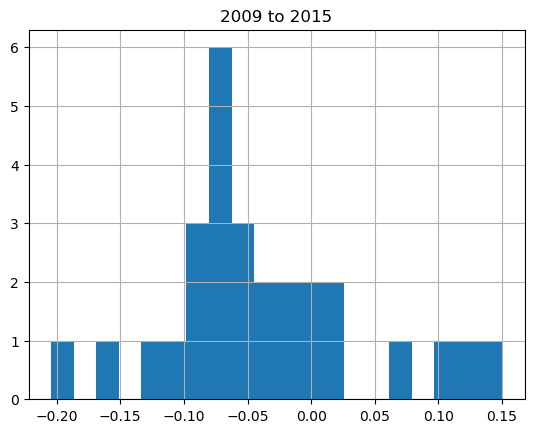

In [4]:
df.hist(column = 'initial_diff', bins = 20)
plt.title('2009 to 2015')

plt.savefig('plots/pdx_09_15_diff.png')
plt.show()


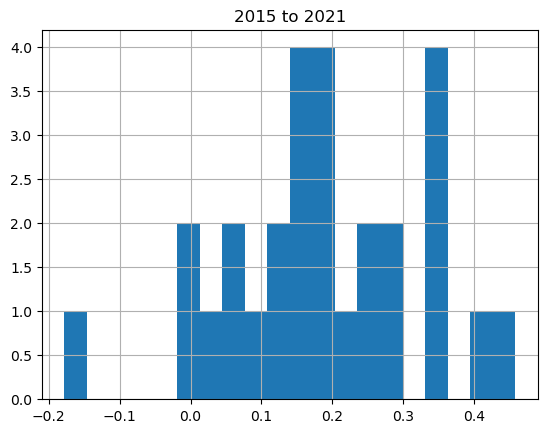

In [5]:
df.hist(column = 'final_diff', bins = 20)
plt.title('2015 to 2021')
plt.savefig('plots/pdx_15_21_diff.png')
plt.show()


# Zoning visualization

In [6]:
pdx_zips = gpd.read_file('PDX_ZIP_Codes.geojson')

In [8]:
pdx_zips['ZIPCODE'] = pdx_zips['ZIPCODE'].astype('int64')

In [9]:
merged = pdx_zips.merge(df, left_on = 'ZIPCODE', right_on = 'ZIP')

In [21]:
#merged.columns

### Binned colormaps

In [12]:
#merged.columns

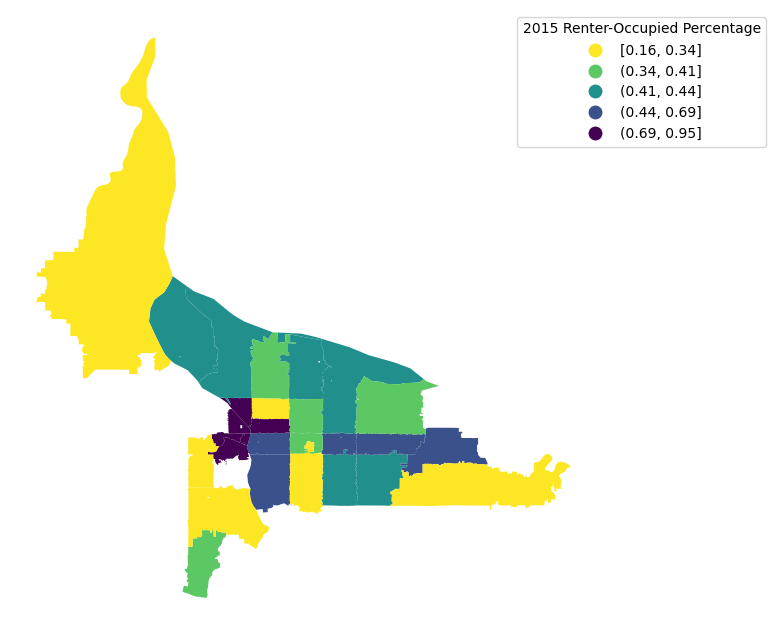

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cmap = plt.colormaps['viridis']
reversed_cmap = cmap.reversed()

ax4 = merged.plot(column='Renter-occupied_pct', legend=True, 
                  scheme='quantiles', cmap=reversed_cmap, ax=ax)



# Customize the legend
legend = ax4.get_legend()
legend.set_title("2015 Renter-Occupied Percentage")
legend.set_bbox_to_anchor((1.3, 1))

q5 = mapclassify.Quantiles(merged['Renter-occupied_pct'], k=5)
mapping = dict([(i, s) for i, s in enumerate(q5.get_legend_classes())])

for i, txt in enumerate(legend.texts):
    txt.set_text(mapping[i])

ax4.set_axis_off()




# Save the plot
output_path = "plots/pdx_rent_pct_choro.png"

plt.savefig(output_path, dpi=300, bbox_inches='tight') 
plt.show()
plt.close()

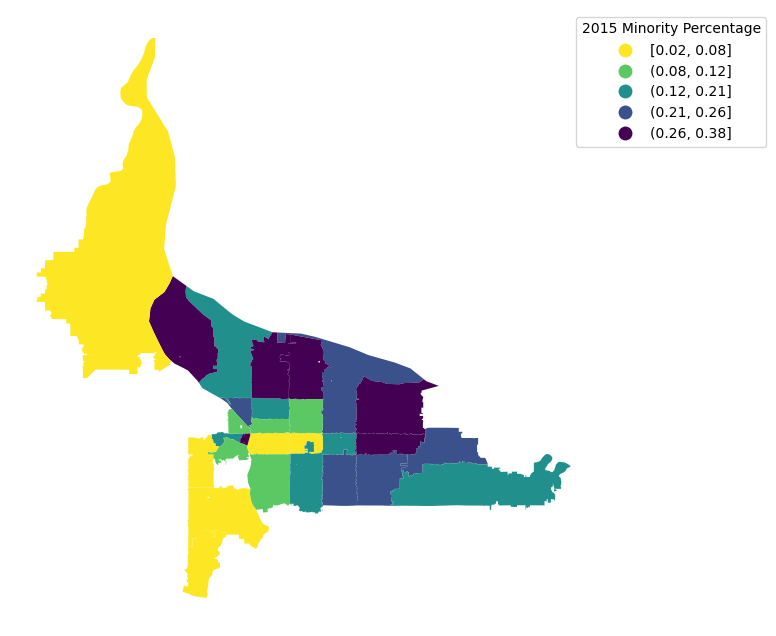

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cmap = plt.colormaps['viridis']
reversed_cmap = cmap.reversed()

ax4 = merged.plot(column='Minority', legend=True, 
                  scheme='quantiles', cmap=reversed_cmap, ax=ax)



# Customize the legend
legend = ax4.get_legend()
legend.set_title("2015 Minority Percentage")
legend.set_bbox_to_anchor((1.3, 1))

q5 = mapclassify.Quantiles(merged['Minority'], k=5)
mapping = dict([(i, s) for i, s in enumerate(q5.get_legend_classes())])

for i, txt in enumerate(legend.texts):
    txt.set_text(mapping[i])

ax4.set_axis_off()




# Save the plot
output_path = "plots/pdx_minority_choro.png"

plt.savefig(output_path, dpi=300, bbox_inches='tight') 
plt.show()
plt.close()

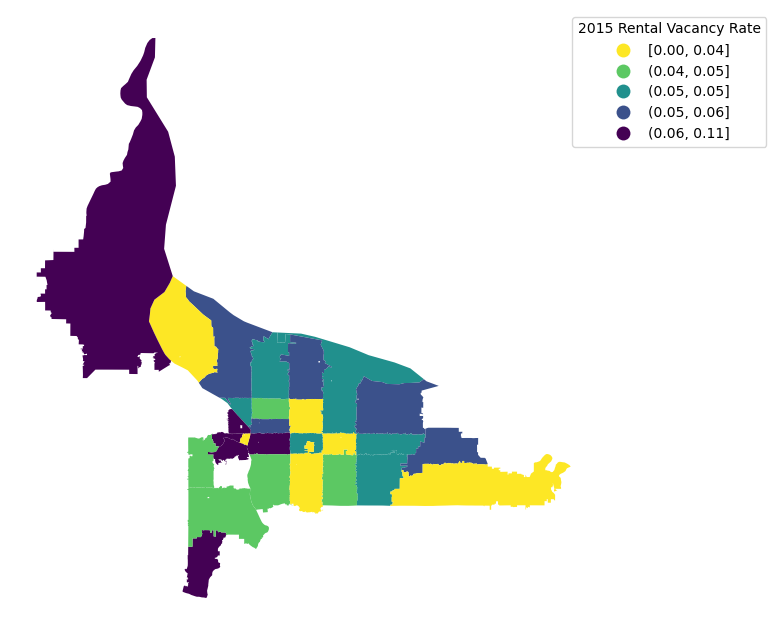

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cmap = plt.colormaps['viridis']
reversed_cmap = cmap.reversed()

ax4 = merged.plot(column='Vacant housing units_pct', legend=True, 
                  scheme='quantiles', cmap=reversed_cmap, ax=ax)



# Customize the legend
legend = ax4.get_legend()
legend.set_title("2015 Rental Vacancy Rate")
legend.set_bbox_to_anchor((1.3, 1))

q5 = mapclassify.Quantiles(merged['Vacant housing units_pct'], k=5)
mapping = dict([(i, s) for i, s in enumerate(q5.get_legend_classes())])

for i, txt in enumerate(legend.texts):
    txt.set_text(mapping[i])

ax4.set_axis_off()




# Save the plot
output_path = "plots/pdx_vacant_units_choro.png"

plt.savefig(output_path, dpi=300, bbox_inches='tight') 
plt.show()
plt.close()

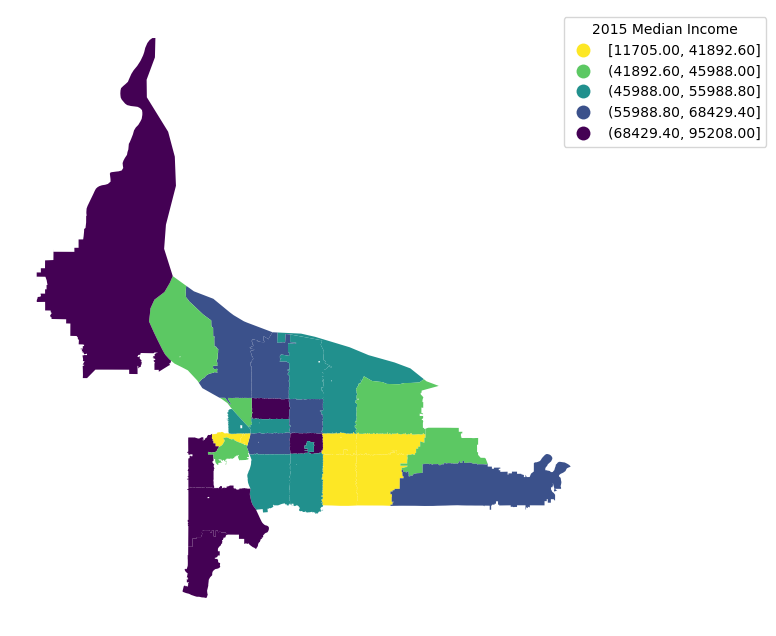

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cmap = plt.colormaps['viridis']
reversed_cmap = cmap.reversed()

ax3 = merged.plot(column='Median income (dollars)', legend=True, 
                  scheme = 'quantiles',
                  cmap=reversed_cmap, ax=ax)



# Customize the legend
legend = ax3.get_legend()
legend.set_title("2015 Median Income")
legend.set_bbox_to_anchor((1.3, 1))

q5 = mapclassify.Quantiles(merged['Median income (dollars)'].astype(int), k=5)
mapping = dict([(i, s) for i, s in enumerate(q5.get_legend_classes())])

for i, txt in enumerate(legend.texts):
    txt.set_text(mapping[i])

ax3.set_axis_off()




# Save the plot
output_path = "plots/pdx_median_inc_choro.png"

plt.savefig(output_path, dpi=300, bbox_inches='tight') 
plt.show()
plt.close()

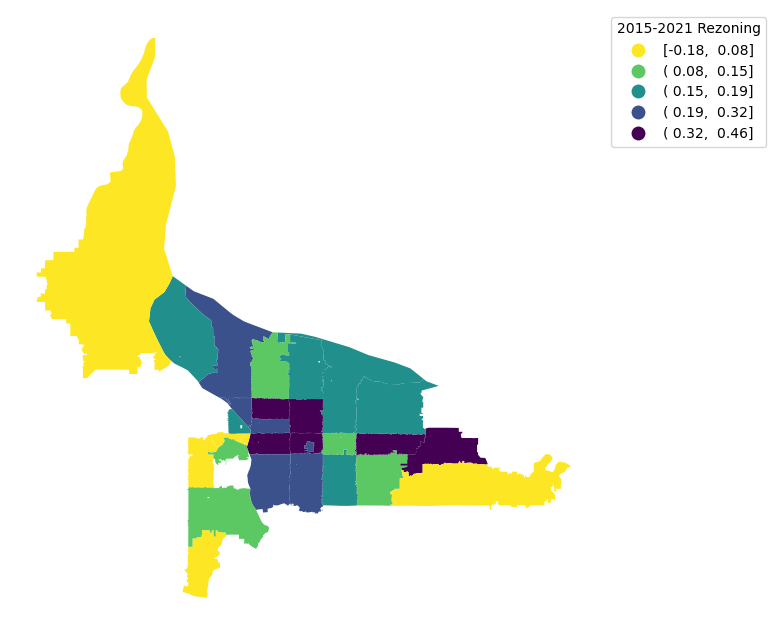

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cmap = plt.colormaps['viridis']
reversed_cmap = cmap.reversed()

ax4 = merged.plot(column='final_diff', legend=True, 
                  scheme='quantiles', cmap=reversed_cmap, ax=ax)



# Customize the legend
legend = ax4.get_legend()
legend.set_title("2015-2021 Rezoning")
legend.set_bbox_to_anchor((1.3, 1))

q5 = mapclassify.Quantiles(merged['final_diff'], k=5)
mapping = dict([(i, s) for i, s in enumerate(q5.get_legend_classes())])

for i, txt in enumerate(legend.texts):
    txt.set_text(mapping[i])

ax4.set_axis_off()




# Save the plot
output_path = "plots/pdx_final_diff_choro.png"

plt.savefig(output_path, dpi=300, bbox_inches='tight') 
plt.show()
plt.close()

## Housing units 

In [17]:
demo = pd.read_csv('pdx_demographic_changes.csv')

In [18]:
demo['ZIP base'].nunique()

28

In [20]:
demo = pdx_zips.merge(demo, left_on = 'ZIPCODE', right_on = 'ZIP 2021')

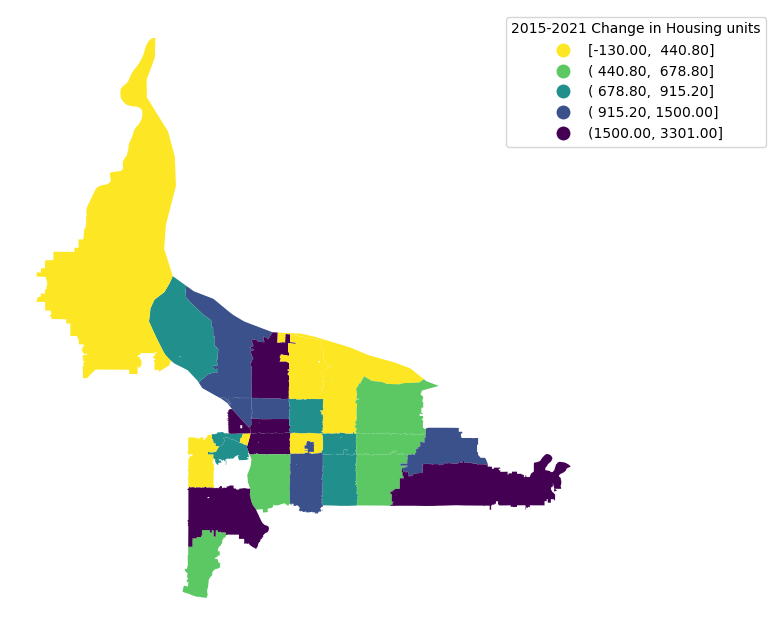

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cmap = plt.colormaps['viridis']
reversed_cmap = cmap.reversed()

ax4 = demo.plot(column='change housing', legend=True, 
                  scheme='quantiles', cmap=reversed_cmap, ax=ax)



# Customize the legend
legend = ax4.get_legend()
legend.set_title("2015-2021 Change in Housing units")
legend.set_bbox_to_anchor((1.3, 1))

q5 = mapclassify.Quantiles(demo['change housing'], k=5)
mapping = dict([(i, s) for i, s in enumerate(q5.get_legend_classes())])

for i, txt in enumerate(legend.texts):
    txt.set_text(mapping[i])

ax4.set_axis_off()




# Save the plot

plt.savefig("plots/pdx_housing_diff_choro.png", dpi=300, bbox_inches='tight') 
plt.show()
plt.close()

# Data Exploration

In [24]:
indep = ['initial_diff', 'final_diff',
       'Male', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian', 
       'Native Hawaiian and Other Pacific Islander', 'Hispanic or Latino (of any race)',
       'Median age (years)', 'Total housing units', 'Mean income (dollars)']

In [25]:
y_0 = df['0BR_change']

# 0br change 

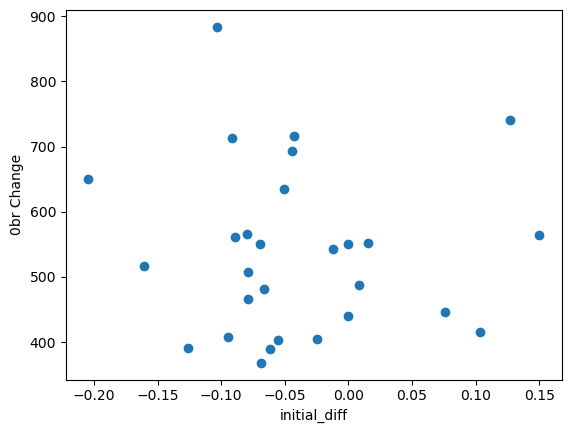

The correlation between 0br_change and initial_diff is: -0.0443230336995811


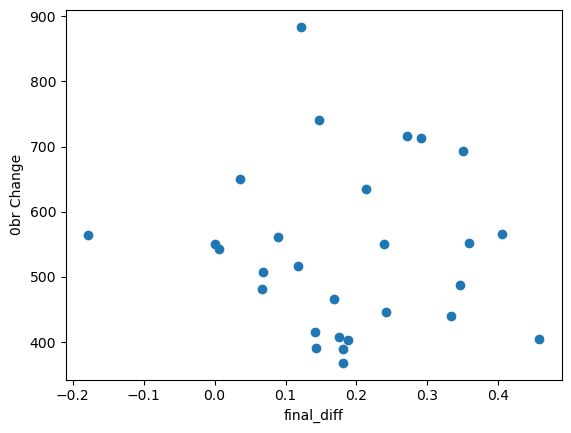

The correlation between 0br_change and final_diff is: -0.056891459427325784


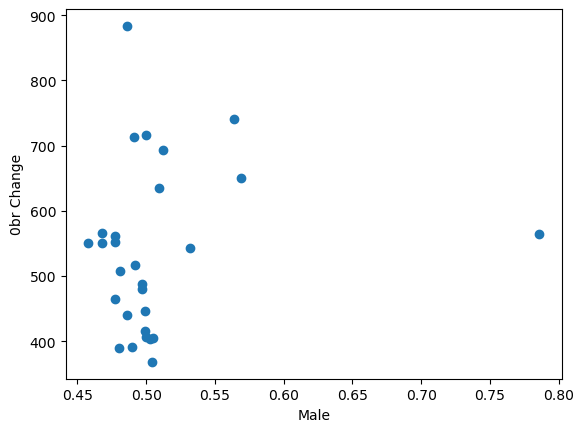

The correlation between 0br_change and Male is: 0.14135210685183108


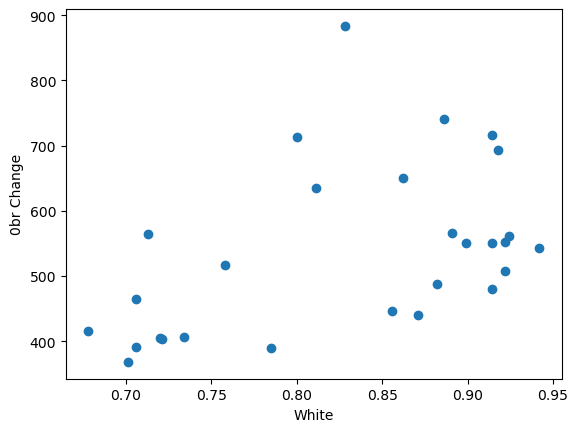

The correlation between 0br_change and White is: 0.4632513782478533


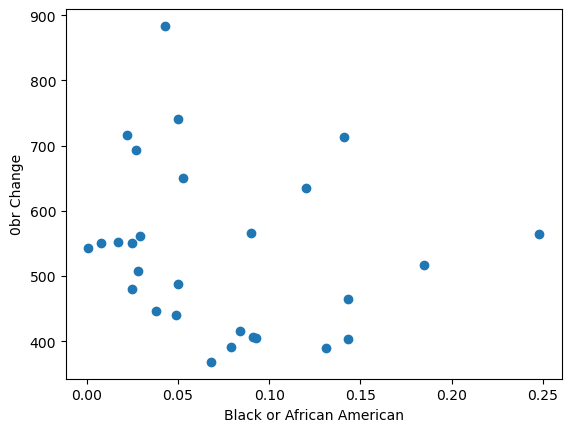

The correlation between 0br_change and Black or African American is: -0.17882233340783005


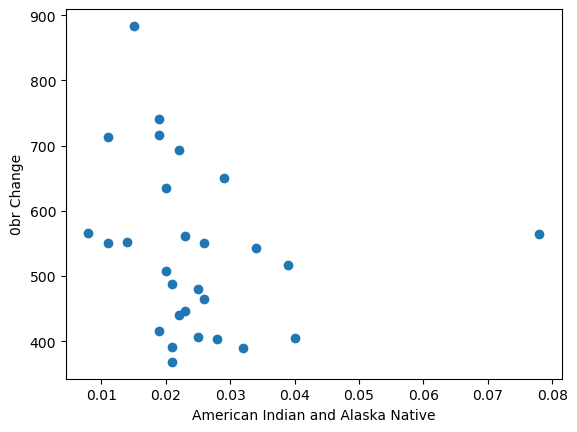

The correlation between 0br_change and American Indian and Alaska Native is: -0.20263724689495907


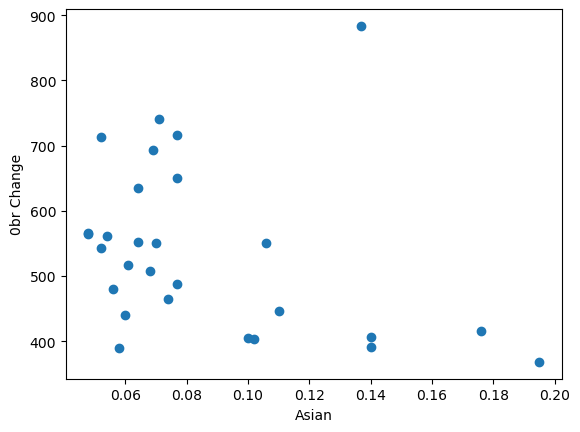

The correlation between 0br_change and Asian is: -0.3093064801571929


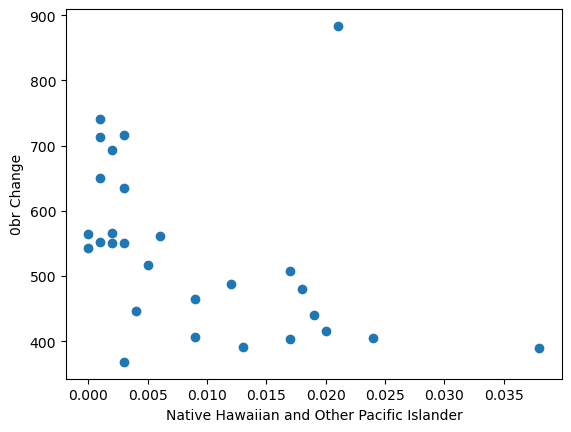

The correlation between 0br_change and Native Hawaiian and Other Pacific Islander is: -0.3956532148024501


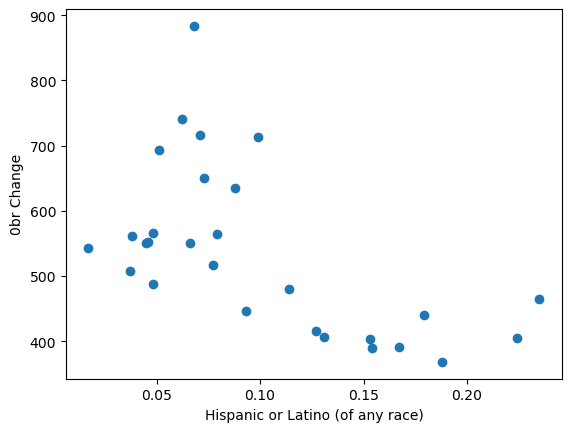

The correlation between 0br_change and Hispanic or Latino (of any race) is: -0.5769637186067044


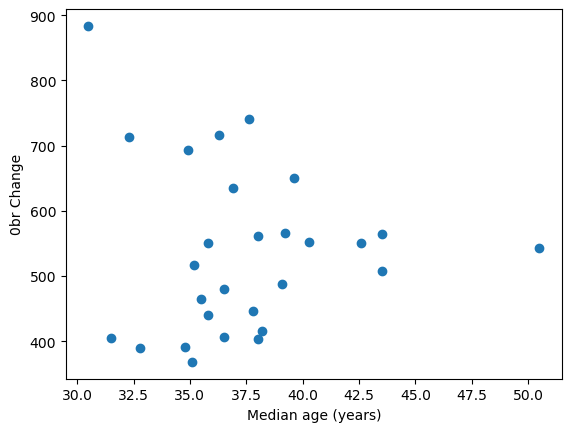

The correlation between 0br_change and Median age (years) is: -0.0691723066754702


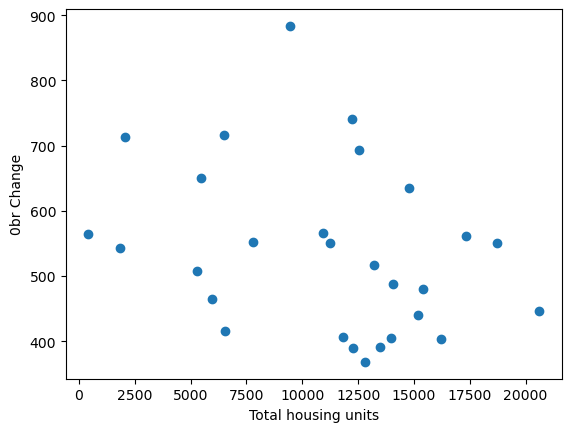

The correlation between 0br_change and Total housing units is: -0.30865883938651967


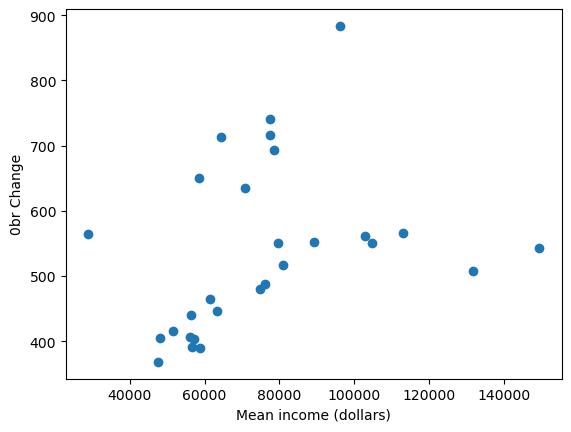

The correlation between 0br_change and Mean income (dollars) is: 0.3176400302211116


In [26]:
for var in indep:
    
    plt.scatter(y = df['0BR_change'], x = df[var])
    plt.ylabel('0br Change')
    plt.xlabel(var)
    plt.show()
    print(f"The correlation between 0br_change and {var} is: {df['0BR_change'].corr(df[var])}")